In [69]:
#Libraries initialization
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as r
from collections import defaultdict
import scipy.sparse as sp

In [70]:
#Adjacency matrix initialization
matrix=np.zeros((100, 100))
n = 500

while n > 0:
    i = r.randint(0,99)
    j = r.randint(0,99)
    if i != j and matrix[i,j] != 1:
        numb = r.randint(1,100)
        matrix[i,j]=numb
        matrix[j,i]=numb
        n -= 1

print(matrix)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 47.  0.  0.]
 ...
 [ 0.  0. 47. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [71]:
#Adjacency matrix to adjacency list
adjlist = defaultdict(list)
edges = set()
for i, v in enumerate(matrix, 1):
    for j, u in enumerate(v, 1):
        if u != 0 and frozenset([i, j]) not in edges:
            edges.add(frozenset([i, j]))
            adjlist[i].append(j)
print (adjlist)

defaultdict(<class 'list'>, {1: [4, 6, 33, 45, 54, 74, 75, 80, 83, 95], 2: [12, 20, 31, 35, 40, 70, 94], 3: [8, 13, 16, 19, 20, 51, 96, 97, 98], 4: [15, 27, 29, 30, 52, 72, 80, 90], 5: [8, 28, 47, 66, 68, 71, 73, 74, 80, 89], 6: [31, 48, 59, 60, 68, 77, 78, 92], 7: [17, 33, 46, 50, 58, 64, 73, 94], 8: [12, 21, 30, 35, 39, 59, 75, 85, 99], 9: [18, 42, 52, 61, 62, 73, 80, 81], 10: [60, 75, 81, 89], 11: [14, 25, 27, 31, 44, 45, 47, 49, 52, 54, 57, 69, 71, 76, 90, 96, 99], 12: [44, 67, 90, 100], 13: [15, 16, 18, 49, 69, 71, 79, 89, 91], 14: [30, 62, 69, 76, 96, 99], 15: [19, 21, 27, 32, 61, 63, 67, 71, 80, 88], 16: [20, 28, 49, 52, 53, 56, 58, 64, 67, 72, 77, 79, 84, 87], 17: [18, 31, 42, 49, 64, 82, 95, 96], 18: [22, 27, 28, 35, 37, 38, 39, 69, 74, 77, 80, 81, 85, 97], 19: [22, 34, 50, 56, 61, 66, 74, 78, 81, 100], 20: [43, 58, 61, 64, 71, 86], 21: [58, 88, 89, 100], 22: [30, 64, 66, 70], 23: [27, 39, 41, 47, 56, 93, 97], 24: [30, 37, 44, 48, 53, 61, 82, 91, 97], 25: [35, 43, 51, 53, 58, 

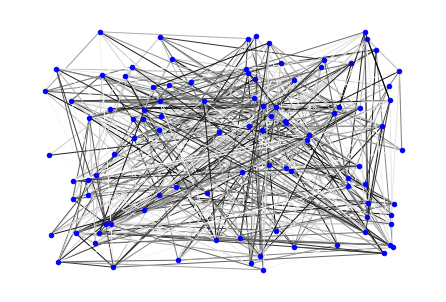

In [72]:
#Graph parameters
def get_matrix_triad(coo_matrix , data=False):
	if not sp.isspmatrix_coo(coo_matrix):
		coo_matrix = sp.coo_matrix(coo_matrix)
	temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
	return temp.tolist()
edags = get_matrix_triad(matrix)

#Graph visualization
G = nx.Graph()
H = nx.path_graph(matrix.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
colors = np.arange(matrix.shape[0])
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G,pos=nx.random_layout(G),node_color='b', node_size = 20, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Greys)
plt.show()

In [96]:
#Floyd algorythm test
Floyd_paths = nx.algorithms.shortest_paths.floyd_warshall(G, 'weight')
print('Floyd–Warshall algorithm result for the 39th node: \n'  + str(Floyd_paths[39]))
print('\nFloyd–Warshall algorithm can show the shortest path between 39th and 99th nodes: \n'  + str(Floyd_paths[39][99]))
print('\nOr the path between any other nodes, for example between 1st and 10th: \n'  + str(Floyd_paths[1][10]))

Floyd–Warshall algorithm result for the 39th node: 
defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x00000249334025E0>, {39: 0, 1: 18.0, 27: 59.0, 34: 13.0, 42.0: 31.0, 43.0: 46.0, 50.0: 49.0, 61.0: 46.0, 78.0: 38.0, 98.0: 57.0, 99.0: 50.0, 0: 77.0, 2: 21.0, 3: 75.0, 4: 68.0, 5: 73.0, 6: 72.0, 7: 66.0, 8: 65.0, 9: 66.0, 10: 63.0, 11: 50.0, 12: 74.0, 13: 71.0, 14: 67.0, 15: 48.0, 16: 116.0, 17: 45.0, 18: 69.0, 19: 19.0, 20: 109.0, 21: 68.0, 22: 82.0, 23: 78.0, 24: 84.0, 25: 98.0, 26: 58.0, 28: 65.0, 29: 79.0, 30: 78.0, 31: 43.0, 32: 98.0, 33: 58.0, 35: 79.0, 36: 76.0, 37: 59.0, 38: 40.0, 40: 81.0, 41: 49.0, 44: 50.0, 45: 52.0, 46: 65.0, 47: 73.0, 48: 61.0, 49: 97.0, 51: 77.0, 52: 82.0, 53: 64.0, 54: 65.0, 55: 75.0, 56: 66.0, 57: 83.0, 58: 85.0, 59: 44.0, 60: 71.0, 62: 69.0, 63: 59.0, 64: 76.0, 65: 79.0, 66: 68.0, 67: 68.0, 68: 46.0, 69: 69.0, 70: 53.0, 71: 61.0, 72: 77.0, 73: 74.0, 74: 64.0, 75: 72.0, 76: 43.0, 77: 82.0, 79: 60.0, 80

In [100]:
#Johnson algorythm test
Johnson_paths = nx.algorithms.shortest_paths.johnson(G, 'weight')
print('Johnson algorithm result for the 39th node: \n'  + str(Johnson_paths[39]))
print('\nJohnson algorithm can show the shortest path between 39th and 99th nodes: \n'  + str(Johnson_paths[39][99]))
print('\nOr the path between any other nodes, for example between 1st and 10th: \n'  + str(Johnson_paths[1][10]))

Johnson algorithm result for the 39th node: 
{39: [39], 1.0: [39, 1.0], 27.0: [39, 34.0, 38.0, 27.0], 34.0: [39, 34.0], 42.0: [39, 42.0], 43.0: [39, 43.0], 50.0: [39, 50.0], 61.0: [39, 61.0], 78.0: [39, 78.0], 98.0: [39, 98.0], 99.0: [39, 1.0, 19.0, 2.0, 96.0, 31.0, 93.0, 99.0], 7.0: [39, 1.0, 19.0, 2.0, 7.0], 17.0: [39, 34.0, 76.0, 17.0], 24.0: [39, 34.0, 59.0, 88.0, 64.0, 24.0], 33.0: [39, 98.0, 33.0], 38.0: [39, 34.0, 38.0], 45.0: [39, 78.0, 45.0], 46.0: [39, 34.0, 46.0], 54.0: [39, 34.0, 54.0], 59.0: [39, 34.0, 59.0], 76.0: [39, 34.0, 76.0], 11.0: [39, 1.0, 11.0], 19.0: [39, 1.0, 19.0], 30.0: [39, 1.0, 30.0], 69.0: [39, 34.0, 38.0, 27.0, 69.0], 93.0: [39, 1.0, 19.0, 2.0, 96.0, 31.0, 93.0], 2.0: [39, 1.0, 19.0, 2.0], 15.0: [39, 1.0, 19.0, 2.0, 15.0], 57.0: [39, 1.0, 19.0, 2.0, 15.0, 57.0], 60.0: [39, 34.0, 38.0, 60.0], 63.0: [39, 1.0, 19.0, 2.0, 15.0, 86.0, 63.0], 70.0: [39, 1.0, 19.0, 70.0], 85.0: [39, 1.0, 19.0, 2.0, 15.0, 86.0, 85.0], 12.0: [39, 1.0, 19.0, 70.0, 12.0], 18.0: [39,